In [2]:
import numpy as np
import torch
import torch.optim as optim
import gym
import matplotlib.pyplot as plt


import site
site.addsitedir('../src/')

from backpropamine_A2C import BP_RNetwork
from BP_A2C.BP_A2C_agent import evaluate_BP_agent

%matplotlib inline

In [3]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
dtype = torch.float

In [4]:
# Environment specific parameters
env_name = 'CartPole-v0'
max_reward = 200
max_steps = 200

n_evaluations = 100

In [5]:
evaluation_seeds = np.load('rstdp_cartpole_stuff/seeds/evaluation_seeds.npy')

In [6]:
# Load pre-trained model weights
weights_0 = torch.load('BP_A2C/results/a2c_result_2_20231014_entropycoef_0.03_valuepredcoef_0.1_batchsize_128_maxsteps_200_maxgradnorm_4.0_gammaR_0.99_l2coef_0_learningrate_0.0001_numtrainepisodes_3000_selectionmethod_evaluation/checkpoint_BP_A2C_0.pt', map_location=torch.device(device))
weights_1 = torch.load('BP_A2C/results/a2c_result_2_20231014_entropycoef_0.03_valuepredcoef_0.1_batchsize_128_maxsteps_200_maxgradnorm_4.0_gammaR_0.99_l2coef_0_learningrate_0.0001_numtrainepisodes_3000_selectionmethod_evaluation/checkpoint_BP_A2C_1.pt', map_location=torch.device(device))
weights_2 = torch.load('BP_A2C/results/a2c_result_2_20231014_entropycoef_0.03_valuepredcoef_0.1_batchsize_128_maxsteps_200_maxgradnorm_4.0_gammaR_0.99_l2coef_0_learningrate_0.0001_numtrainepisodes_3000_selectionmethod_evaluation/checkpoint_BP_A2C_2.pt', map_location=torch.device(device))
weights_3 = torch.load('BP_A2C/results/a2c_result_2_20231014_entropycoef_0.03_valuepredcoef_0.1_batchsize_128_maxsteps_200_maxgradnorm_4.0_gammaR_0.99_l2coef_0_learningrate_0.0001_numtrainepisodes_3000_selectionmethod_evaluation/checkpoint_BP_A2C_3.pt', map_location=torch.device(device))
weights_4 = torch.load('BP_A2C/results/a2c_result_2_20231014_entropycoef_0.03_valuepredcoef_0.1_batchsize_128_maxsteps_200_maxgradnorm_4.0_gammaR_0.99_l2coef_0_learningrate_0.0001_numtrainepisodes_3000_selectionmethod_evaluation/checkpoint_BP_A2C_4.pt', map_location=torch.device(device))
weights = [weights_0, weights_1, weights_2, weights_3, weights_4]


In [7]:
# Helper for printing
eraser = '\b \b'

### Evaluate pre-trained BP models on original environment

In [19]:
original_eval_rewards = []

for i, w in enumerate(weights):
    print('Run {:02d} ...'.format(i), end='')
    agent_net = BP_RNetwork(4, 64, 2, 5).to(device)
    agent_net.loadWeights(w)

    rewards = evaluate_BP_agent(agent_net, env_name, n_evaluations, evaluation_seeds, 1.0)
    original_eval_rewards.append(rewards)
    
    print(eraser*3 + '-> Avg reward: {:7.2f}'.format(np.mean(rewards)))

print(f"Mean avg reward: {np.mean(original_eval_rewards)}")

Run 00 ...

/home/luuk/Desktop/testing/.venv/lib/python3.8/site-packages/gym/logger.py:30: UserWarning: WARN: Box bound precision lowered by casting to float32
  warnings.warn(colorize('%s: %s'%('WARN', msg % args), 'yellow'))


-> Avg reward:  200.00
Run 01 -> Avg reward:  200.00
Run 02 -> Avg reward:  200.00
Run 03 -> Avg reward:  200.00
Run 04 -> Avg reward:  200.00
Mean avg reward: 200.0


### Evaluate pre-trained BP models on modified environments

In [8]:
percentages = np.linspace(1.1, 2.0, 10)
all_modified_env_eval_rewards = []
for percentage in percentages:

    modified_env_eval_rewards = []

    for i, w in enumerate(weights):
        print('Run {:02d} ...'.format(i), end='')
        policy_net = BP_RNetwork(4, 64, 2, 5).to(device)
        policy_net.loadWeights(w)

        rewards = evaluate_BP_agent(policy_net, env_name, n_evaluations, evaluation_seeds, percentage)
        modified_env_eval_rewards.append(rewards)
        
        print(eraser*3 + '-> Avg reward: {:7.2f}'.format(np.mean(rewards)))

    all_modified_env_eval_rewards.append(modified_env_eval_rewards)


Run 00 ...

/home/luuk/Desktop/testing/.venv/lib/python3.8/site-packages/gym/logger.py:30: UserWarning: WARN: Box bound precision lowered by casting to float32
  warnings.warn(colorize('%s: %s'%('WARN', msg % args), 'yellow'))


-> Avg reward:  200.00
Run 01 -> Avg reward:  200.00
Run 02 -> Avg reward:  199.98
Run 03 -> Avg reward:  200.00
Run 04 -> Avg reward:  200.00
Run 00 -> Avg reward:  200.00
Run 01 -> Avg reward:  200.00
Run 02 -> Avg reward:  200.00
Run 03 -> Avg reward:  200.00
Run 04 -> Avg reward:  200.00
Run 00 -> Avg reward:  200.00
Run 01 -> Avg reward:  200.00
Run 02 -> Avg reward:  200.00
Run 03 -> Avg reward:  200.00
Run 04 -> Avg reward:  200.00
Run 00 -> Avg reward:  200.00
Run 01 -> Avg reward:  200.00
Run 02 -> Avg reward:  200.00
Run 03 -> Avg reward:  200.00
Run 04 -> Avg reward:  200.00
Run 00 -> Avg reward:  200.00
Run 01 -> Avg reward:  200.00
Run 02 -> Avg reward:  200.00
Run 03 -> Avg reward:  200.00
Run 04 -> Avg reward:  198.22
Run 00 -> Avg reward:  200.00
Run 01 -> Avg reward:  200.00
Run 02 -> Avg reward:  200.00
Run 03 -> Avg reward:  200.00
Run 04 -> Avg reward:  153.30
Run 00 -> Avg reward:  200.00
Run 01 -> Avg reward:  200.00
Run 02 -> Avg reward:  200.00
Run 03 -> Avg re

In [13]:
mean_avgs = []
std_dev_avgs = []
for results in all_modified_env_eval_rewards:
    mean_avgs.append(np.mean(results))
    std_dev_avgs.append(np.std(results))
    print(np.mean(results))

199.996
200.0
200.0
200.0
199.644
190.66
166.04
164.252
164.294
164.076


Text(0.5, 1.0, 'Average reward (over 100 episodes and 5 models) BP A2C RNN')

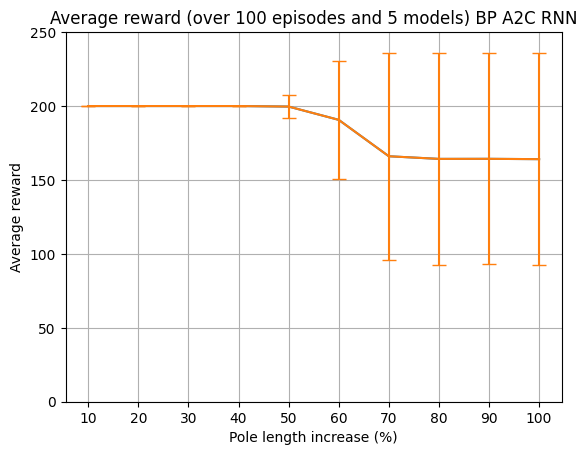

In [14]:
fig = plt.figure()
percentages = np.linspace(10, 100, 10)
plt.plot(percentages, mean_avgs)
plt.errorbar(percentages, mean_avgs, std_dev_avgs, capsize=5)
plt.ylim(0, 250)
plt.grid(True)
plt.xlabel("Pole length increase (%)")
plt.xticks(percentages)
plt.ylabel("Average reward")
plt.title("Average reward (over 100 episodes and 5 models) BP A2C RNN")
# plt.savefig("figs/BP_A2C_RNN_5models_evaluation.png", dpi=300)